<a href="https://colab.research.google.com/github/pablopuch/Laberinto-Q-Learning-Recorrido-en-Abanico/blob/main/Laberinto_Q_Learning_Recorrido_en_Abanico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Laberinto Recursividad

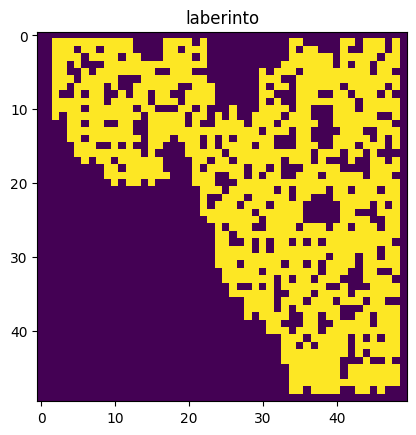

In [ ]:
n=50
maze=np.zeros((n,n),dtype=int) 

for t in range(n):
    maze[0,t]=1
    maze[n-1,t]=1
    maze[t,0]=1
    maze[t,n-1]=1

porcentaje=30
t=0
while t<(porcentaje/100)*n*n:
    i=np.random.randint(n)
    j=np.random.randint(n)
    maze[i,j]=1
    t=t+1
    
#plt.figure(figsize=(10,10))
plt.title("laberinto")
plt.imshow(maze)

mark=np.zeros((n,n),dtype=int) 

move=np.zeros((4,2),dtype=int) 
move[0,0]=-1
move[0,1]=0
move[1,0]=0
move[1,1]=1
move[2,0]=1
move[2,1]=0
move[3,0]=0
move[3,1]=-1

solX=n-2
solY=n-2
def resolver(i,j):
    if ((i==solX) and (j==solY)):
        print ("encontrado")                 
    else:
        for mov in range(0,3):
            g=i+move[mov,0]
            h=j+move[mov,1]
            if (g>=0 and g<=n and h>=0 and h<=n):
                if ((mark[g,h]==0) and (maze[g,h]==0)):
                    mark[g,h]=1
                    resolver(g,h)
                    
resolver(2,2)                
plt.imshow(mark)

# Laberinto Recursividad en Abanico

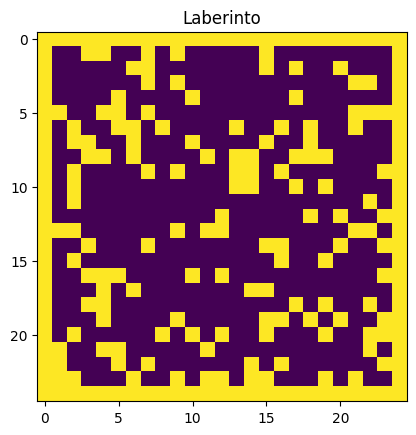

In [ ]:
n=25 # tamaña del laberinto
porcentaje=30 # numero en % de paredes
maze=np.zeros((n,n),dtype=int) # generar laberinto

# punto salida y llegada
start_state = (1, 1)
end_state = (n-2, n-2)

# Rellenamos los bordes
for t in range(n):
    maze[0,t]=1
    maze[n-1,t]=1
    maze[t,0]=1
    maze[t,n-1]=1

t=0

# bucle para gnerar las paredes del laberinto
while t<(porcentaje/100)*n*n:
    i=np.random.randint(n)
    j=np.random.randint(n)
    maze[i,j]=1
    t=t+1


move=np.zeros((4,2),dtype=int) 
# Moverse hacia: DERECHA
move[0,0]= 0 
move[0,1]= 1
# Moverse hacia: ABAJO
move[1,0]= 1 
move[1,1]= 0
# Moverse hacia: IZQUIERDA
move[2,0]= 0
move[2,1]= -1
# Moverse hacia: ARRIBA
move[3,0]= -1
move[3,1]= 0
    

    
plt.title("Laberinto")
plt.imshow(maze)

In [ ]:
# Objeto Posición para introducir en la cola
class Celda:
    def __init__(self, fila, columna):
      # Inicia las filas y columnas de la celda
        self.fila = fila
        self.columna = columna

    def __str__(self):
      # Devuelve los valores de la celda
      return f'[{self.fila},{self.columna}]'
    
    def __eq__(self, other): 
      # Indica si la celda está implementada o no, en caso contrario genera una
        if not isinstance(other, Celda):
            return NotImplemented
        return self.fila == other.fila and self.columna == other.columna

class Cola:
    def __init__(self):
        # Se genera una cola vacía al inciiarse
        self.items = []

    def encolar(self, x):
        # Agregar un elemento al final de la cola
        self.items.append(x)

    def desencolar(self):
        # Eliminar el primer elemento de la cola y obtener su valor
        try:
            return self.items.pop(0)
        except:
            raise ValueError("La cola está vacía")

    def esta_vacia(self):

        return self.items == []

    def obtener(self):
        # Obtiene la lista de la cola
        return self.items
    
    def mostrarCola(self):
        for c in self.items:
          print(c)

In [ ]:
cola = Cola()
celda_inicial = Celda(start_state[0], start_state[1])

cola.encolar(celda_inicial)

fin = False
cont = 0 # contador

def resolver():
    global fin
    global cont

    # while (fin==False): 
    cont += 1
    celda_actual = cola.desencolar()

    if (celda_actual.fila==end_state[0]) and (celda_actual.columna==end_state[1]):
            fin = True
            #Marco la llegada al final
            mark[celda_actual.fila, celda_actual.columna] = -1
            return

    else:
            for i in range(0,4):
                movimiento_fila = celda_actual.fila + move[i,0]
                movimiento_columna = celda_actual.columna + move[i,1]

                if (mark[movimiento_fila,movimiento_columna]==0) and (maze[movimiento_fila,movimiento_columna]==0):
                    mark[celda_actual.fila,celda_actual.columna] = cont

                    if Celda(movimiento_fila, movimiento_columna) not in cola.obtener():
                        cola.encolar(Celda(movimiento_fila,movimiento_columna))

            plt.imshow(mark)
            resolver()

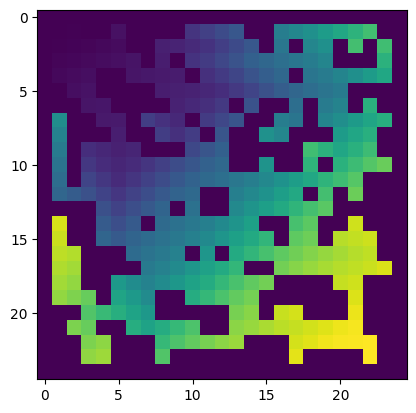

In [ ]:
mark=np.zeros((n,n),dtype=int)
resolver()

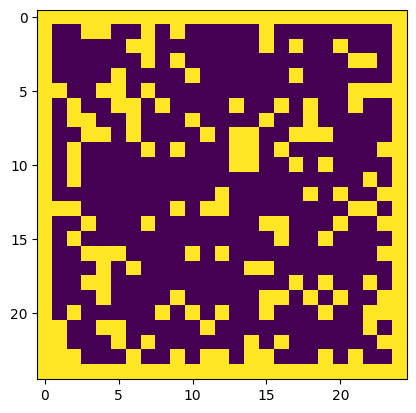

In [ ]:
plt.imshow(maze)